In [1]:
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

urlretrieve(url, 'global_cases_covid19.csv')

('global_cases_covid19.csv', <http.client.HTTPMessage at 0x7f9392868490>)

In [3]:
df_covid = pd.read_csv('global_cases_covid19.csv')

In [4]:
df_covid.shape

(285, 950)

In [5]:
df_covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22,8/23/22,8/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,189343,189477,189710,190010,190254,190435,190643,191040,191247,191585
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,322125,322837,323282,323829,325241,325736,326077,326181,326787,327232
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,269269,269381,269473,269556,269650,269731,269805,269894,269971,270043
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45899,45899,45975,45975,45975,45975,45975,45975,45975,46027
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


In [6]:
type(df_covid)

pandas.core.frame.DataFrame

In [7]:
df_covid.drop(['Lat', 'Long'], axis=1, inplace=True)

In [8]:
#pelo fato de exstir paises em que seus valores estão divididos por estados/provincias, o ideal é agrupar e utilizar o sum para somar.
df_country = df_covid.groupby(by=('Country/Region')).sum()

In [9]:
df_country

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22,8/23/22,8/24/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,189343,189477,189710,190010,190254,190435,190643,191040,191247,191585
Albania,0,0,0,0,0,0,0,0,0,0,...,322125,322837,323282,323829,325241,325736,326077,326181,326787,327232
Algeria,0,0,0,0,0,0,0,0,0,0,...,269269,269381,269473,269556,269650,269731,269805,269894,269971,270043
Andorra,0,0,0,0,0,0,0,0,0,0,...,45899,45899,45975,45975,45975,45975,45975,45975,45975,46027
Angola,0,0,0,0,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,697447,697447,697447,697447,697447,697447,697447,698384,698384,698384
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11903,11903,11903,11914,11915,11915,11915,11915,11917,11919


In [10]:
#quando for acessar o coluna, a forma usual é df_covid['nome da coluna']
#quando for para acessar uma linha, aplica-se o loc. df_covid.loc['nome da linha']
df_country.loc['Afghanistan']

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
8/20/22    190435
8/21/22    190643
8/22/22    191040
8/23/22    191247
8/24/22    191585
Name: Afghanistan, Length: 946, dtype: int64

In [11]:
df_country.loc['Brazil']

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
8/20/22    34264237
8/21/22    34264237
8/22/22    34284864
8/23/22    34284864
8/24/22    34329600
Name: Brazil, Length: 946, dtype: int64

In [12]:
date = df_country.loc['Brazil'].index
cases = df_country.loc['Brazil'].values

In [13]:
#no código acima, nota-se que foi feita a separçaão do indice com os valores, e cada um jogado em uma variável.
#para fazer isso, separar, usa-se o "index" e "values"

In [14]:
date

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '8/15/22', '8/16/22', '8/17/22', '8/18/22', '8/19/22', '8/20/22',
       '8/21/22', '8/22/22', '8/23/22', '8/24/22'],
      dtype='object', length=946)

In [15]:
cases

array([       0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        1,
              1,        1,        2,        2,        2,        2,
              4,        4,       13,       13,       20,       25,
             31,       38,       52,      151,      151,      162,
            200,      321,      372,      621,      793,     1021,
           1546,     1924,     2247,     2554,     2985,     3417,
           3904,     4256,     4579,     5717,     6836,     8044,
           9056,    10360,    11130,    12161,    14034,    16170,
          18092,    19638,    20727,    22192,    23430,    25262,
          28320,    30425,    33682,    36658,    38654,    40

<BarContainer object of 946 artists>

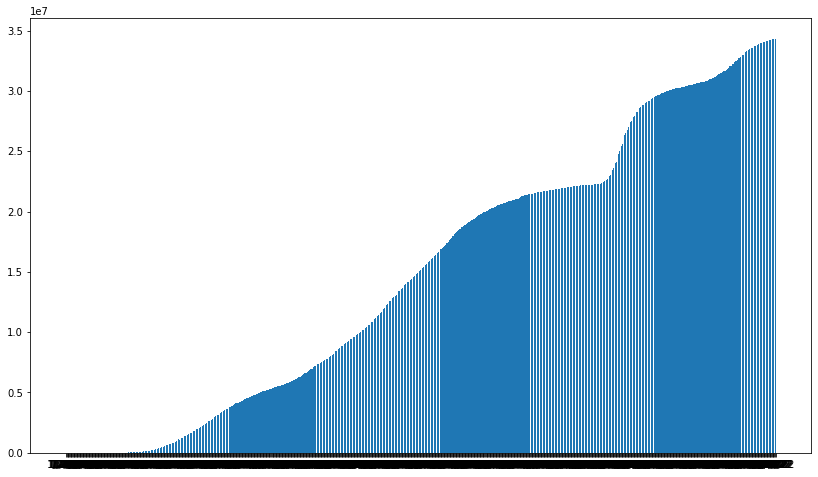

In [17]:
plt.figure(figsize=(14,8))
plt.bar(date, cases)

In [18]:
#pelo fato do virus da covid19 chegar somente no final de fevereiro, a ideia é tirar essas semanas inicial com zero caso
df_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22,8/23/22,8/24/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,189343,189477,189710,190010,190254,190435,190643,191040,191247,191585
Albania,0,0,0,0,0,0,0,0,0,0,...,322125,322837,323282,323829,325241,325736,326077,326181,326787,327232
Algeria,0,0,0,0,0,0,0,0,0,0,...,269269,269381,269473,269556,269650,269731,269805,269894,269971,270043
Andorra,0,0,0,0,0,0,0,0,0,0,...,45899,45899,45975,45975,45975,45975,45975,45975,45975,46027
Angola,0,0,0,0,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


In [19]:
#nao chega a ser um dataframe, pois tem somente uma linha
s_brazil = df_country.loc[ 'Brazil']

In [20]:
s_brazil

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
8/20/22    34264237
8/21/22    34264237
8/22/22    34284864
8/23/22    34284864
8/24/22    34329600
Name: Brazil, Length: 946, dtype: int64

In [22]:
#aqui, filtramos para apresentar valores a partir do primeiro caso confirmado da covid no país
s_brazil = s_brazil[s_brazil > 0]

In [23]:
s_brazil

2/26/20           1
2/27/20           1
2/28/20           1
2/29/20           2
3/1/20            2
             ...   
8/20/22    34264237
8/21/22    34264237
8/22/22    34284864
8/23/22    34284864
8/24/22    34329600
Name: Brazil, Length: 911, dtype: int64

In [27]:
#apresentando todas as datas do indice com "index"
s_brazil.index

Index(['2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20',
       '3/3/20', '3/4/20', '3/5/20', '3/6/20',
       ...
       '8/15/22', '8/16/22', '8/17/22', '8/18/22', '8/19/22', '8/20/22',
       '8/21/22', '8/22/22', '8/23/22', '8/24/22'],
      dtype='object', length=911)

In [28]:
#apresentando todas os valores com "values"
s_brazil.values

array([       1,        1,        1,        2,        2,        2,
              2,        4,        4,       13,       13,       20,
             25,       31,       38,       52,      151,      151,
            162,      200,      321,      372,      621,      793,
           1021,     1546,     1924,     2247,     2554,     2985,
           3417,     3904,     4256,     4579,     5717,     6836,
           8044,     9056,    10360,    11130,    12161,    14034,
          16170,    18092,    19638,    20727,    22192,    23430,
          25262,    28320,    30425,    33682,    36658,    38654,
          40743,    43079,    45757,    50036,    54043,    59324,
          63100,    67446,    73235,    79685,    87187,    92202,
          97100,   101826,   108620,   115455,   126611,   135773,
         146894,   156061,   162699,   169594,   178214,   190137,
         203165,   220291,   233511,   241080,   255368,   271885,
         294624,   312761,   334568,   351565,   366033,   378

<BarContainer object of 911 artists>

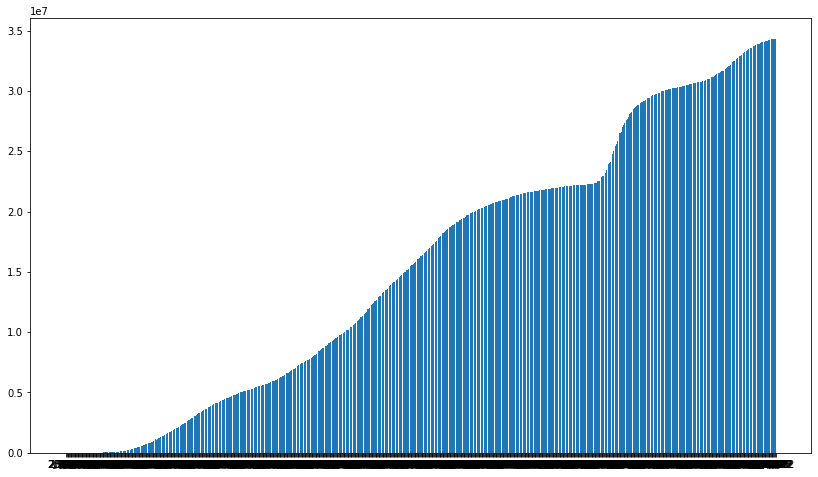

In [29]:
plt.figure(figsize=(14,8))
plt.bar(s_brazil.index, s_brazil.values)

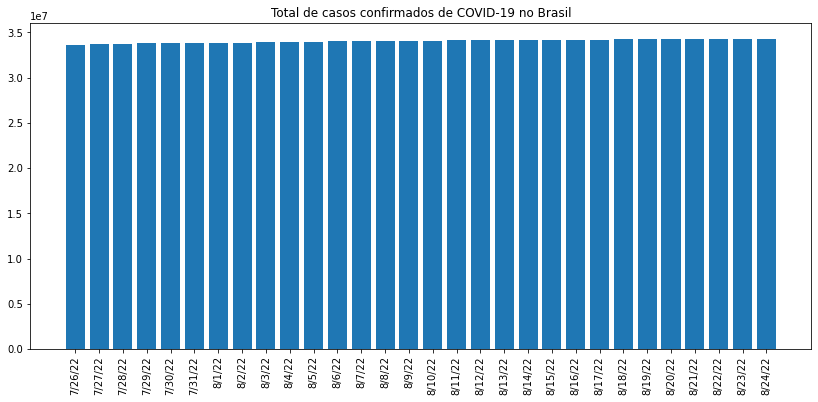

In [37]:
#como tem muitas datas, foi recomendado filtrar pelos últimos 30 dias
#usar a ideia e conceito de fatiamento
#inicialmente foi feita a contagem via len()
tam = len(s_brazil)
plt.figure(figsize=(14,6))
plt.title('Total de casos confirmados de COVID-19 no Brasil')
plt.bar(s_brazil.index[tam-30:tam], s_brazil.values[tam-30:tam])
plt.xticks(rotation=90)
plt.show()